In [40]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
# from tensorflow.python.keras.layers import Dense
# from tensorflow.python.keras import Sequential
import numpy as np
from keras import regularizers

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
print(tf.__version__)

2.2.0-rc1


Using TensorFlow backend.


In [0]:
ESR = pd.read_csv('../Epileptic_Seizure_Recognition.csv')

The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


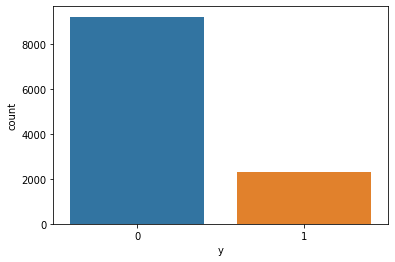

In [227]:
cols = ESR.columns
tgt = ESR.y
tgt[tgt>1]=0
ax = sn.countplot(tgt,label="Count")
non_seizure, seizure = tgt.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)


In [228]:
ESR.isnull().sum()


Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [229]:
ESR.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [230]:
ESR.describe()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,-5.827478,-6.042174,-6.687304,-7.088870,-7.211217,-7.088261,-6.806696,-6.744696,-6.484783,-6.448435,-6.355391,-6.543130,-6.884348,-6.883217,-6.118870,-5.15913,-4.785652,-4.874783,-5.393565,-5.935478,-6.349913,-6.212522,-5.859826,-5.299826,-4.955652,-5.278087,-6.162261,-7.316609,-7.998522,-7.818870,...,-6.997304,-7.339391,-7.911565,-8.177304,-8.608870,-8.578087,-8.240000,-7.691391,-7.356522,-7.228783,-6.980870,-6.756783,-6.355304,-6.423826,-6.465217,-6.316435,-5.808000,-5.255913,-4.682087,-4.638609,-4.770261,-5.650870,-7.170348,-8.759826,-9.784783,-10.096261,-9.842957,-9.701739,-9.351391,-9.498870,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,160.471017,161.181118,165.071121,169.198359,170.641967,168.930355,164.646296,162.062661,162.571333,162.339911,162.823325,163.909723,165.844176,166.009100,164.715153,162.77423,162.902294,164.799831,165.391697,164.291120,163.165167,163.408052,163.561408,162.548119,160.813772,160.441049,162.881958,166.235164,166.314965,164.513017,...,168.567495,168.662705,167.643458,167.414439,167.922773,168.274009,167.808218,166.739558,165.678558,167.130911,168.156296,167.459868,165.061414,164.248830,166.226332,168.143625,167.067064,166.446540,167.554020,169.418457,170.639171,170.817824,168.145372,166.817974,166.999981,167.756860,166.988820,167.062497,166.606345,165.235574,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,-1765.000000,-1803.000000,-1833.000000,-1867.000000,-1870.000000,-1839.000000,-1867.000000,-1856.000000,-1844.000000,-1717.000000,-1764.000000,-1856.000000,-1844.000000,-1866.000000,-1863.000000,-1866.00000,-1781.000000,-1860.000000,-1818.000000,-1867.000000,-1743.000000,-1517.000000,-1552.000000,-1720.000000,-1864.000000,-1814.000000,-1829.000000,-1851.000000,-1840.000000,-1673.000000,...,-1867.000000,-1826.000000,-1866.000000,-1854.000000,-1789.000000,-1872.000000,-1866.000000,-1675.000000,-1778.000000,-1733.000000,-1862.000000,-1861.000000,-1857.000000,-1839.000000,-1860.000000,-1843.000000,-1863.000000,-1861.000000,-1845.000000,-1820.000000,-1864.000000,-1868.000000,-1855.000000,-1852.000000,-1870.000000,-1847.000000,-1578.000000,-1838.000000,-1763.0000

In [231]:
X = ESR.iloc[:,1:179].values
X.shape

(11500, 178)

Text(0.5, 0, 'Samples')

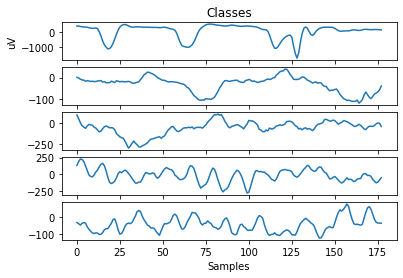

In [232]:
plt.subplot(511)
plt.plot(X[1,:])
plt.title('Classes')
plt.ylabel('uV')
plt.subplot(512)
plt.plot(X[7,:])
plt.subplot(513)
plt.plot(X[12,:])
plt.subplot(514)
plt.plot(X[0,:])
plt.subplot(515)
plt.plot(X[2,:])
plt.xlabel('Samples')


In [233]:
y = ESR.iloc[:,179].values
y

array([0, 1, 0, ..., 0, 0, 0])

In [234]:
y[y>1]=0
y

array([0, 1, 0, ..., 0, 0, 0])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [273]:
X_train.shape

(9200, 178)

In [0]:
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [286]:
model_m = keras.Sequential()
model_m.add(keras.layers.Conv1D(80, 1, activation='relu', strides=10,input_shape=(None, 178), kernel_initializer= 'uniform'))
# model_m.add(keras.layers.Conv1D(80, 1, activation='relu',kernel_initializer= 'uniform'))
model_m.add(keras.layers.GlobalAveragePooling1D())

model_m.add(keras.layers.Dropout(0.5))

model_m.add(keras.layers.Dense(2, activation='softmax'))
print(model_m.summary())

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_151 (Conv1D)          (None, None, 80)          14320     
_________________________________________________________________
global_average_pooling1d_23  (None, 80)                0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_89 (Dense)             (None, 2)                 162       
Total params: 14,482
Trainable params: 14,482
Non-trainable params: 0
_________________________________________________________________
None


In [293]:
model_m.compile(loss='binary_crossentropy',
                optimizer='adam', metrics=['accuracy'])
history = model_m.fit(trainX,
                      y_train,
                      batch_size=500,
                      epochs=50,
                      
                      verbose=2)

Epoch 1/50
19/19 - 0s - loss: 0.6931 - accuracy: 0.4829
Epoch 2/50
19/19 - 0s - loss: 0.6931 - accuracy: 0.5215
Epoch 3/50
19/19 - 0s - loss: 0.6931 - accuracy: 0.5389
Epoch 4/50
19/19 - 0s - loss: 0.6931 - accuracy: 0.5420
Epoch 5/50
19/19 - 0s - loss: 0.6931 - accuracy: 0.5163
Epoch 6/50
19/19 - 0s - loss: 0.6931 - accuracy: 0.5857
Epoch 7/50
19/19 - 0s - loss: 0.6931 - accuracy: 0.5084
Epoch 8/50
19/19 - 0s - loss: 0.6931 - accuracy: 0.5623
Epoch 9/50
19/19 - 0s - loss: 0.6931 - accuracy: 0.4882
Epoch 10/50
19/19 - 0s - loss: 0.6931 - accuracy: 0.5203
Epoch 11/50
19/19 - 0s - loss: 0.6931 - accuracy: 0.5190
Epoch 12/50
19/19 - 0s - loss: 0.6931 - accuracy: 0.5049
Epoch 13/50
19/19 - 0s - loss: 0.6931 - accuracy: 0.4971
Epoch 14/50
19/19 - 0s - loss: 0.6931 - accuracy: 0.4618
Epoch 15/50
19/19 - 0s - loss: 0.6931 - accuracy: 0.5301
Epoch 16/50
19/19 - 0s - loss: 0.6931 - accuracy: 0.4058
Epoch 17/50
19/19 - 0s - loss: 0.6931 - accuracy: 0.4608
Epoch 18/50
19/19 - 0s - loss: 0.6931 - 

In [296]:

# y_pred = classifier.predict(X_test, verbose =0)
# y_pred = (y_pred > 0.5)
yhat_probs = model_m.predict(testX, verbose=0)
# predict crisp classes for test set
yhat_classes = model_m.predict_classes(testX, verbose=0)
yhat_probs = yhat_probs[:, 0]
# yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.850435
Precision: 0.674074
Recall: 0.415525
F1 score: 0.514124
Cohens kappa: 0.431560
ROC AUC: 0.474637
[[1774   88]
 [ 256  182]]
